In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
df = pd.read_csv("BigBasketProducts.csv")
df.head()


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [ ]:
df.info()
#getting information about columns and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
df.isna().sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,0
market_price,0
type,0
rating,8626
description,115


In [ ]:
df = df.dropna()
df.isna().sum()


,0
index,0
product,0
category,0
sub_category,0
brand,0
sale_price,0
market_price,0
type,0
rating,0
description,0


In [ ]:
df.tail()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."
27554,27555,United Dreams Go Far Deodorant,Beauty & Hygiene,Men's Grooming,United Colors Of Benetton,214.53,390.0,Men's Deodorants,4.5,The new mens fragrance from the United Dreams ...


In [ ]:
df.columns.tolist()

['index',
 'product',
 'category',
 'sub_category',
 'brand',
 'sale_price',
 'market_price',
 'type',
 'rating',
 'description']

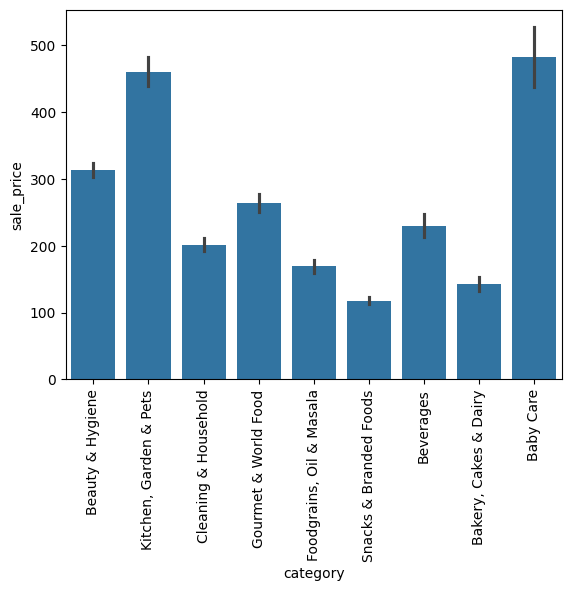

In [ ]:
sns.barplot(x = 'category' , y='sale_price', data = df)
plt.xticks(rotation = 90)
plt.show()

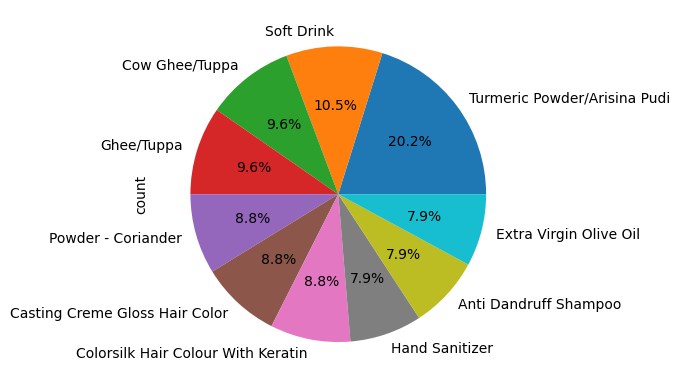

In [ ]:
df['product'].value_counts().head(10).plot(kind= 'pie', autopct = '%1.1f%%')
plt.show()
#top 10 best sellers

<Axes: xlabel='sale_price'>

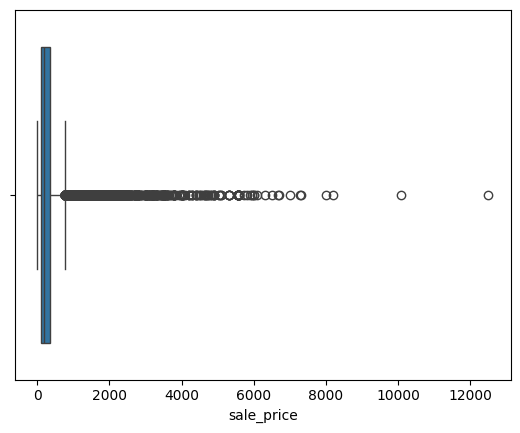

In [58]:
#as we can see there are alot of outliers
sns.boxplot(df['sale_price'], orient= 'h')

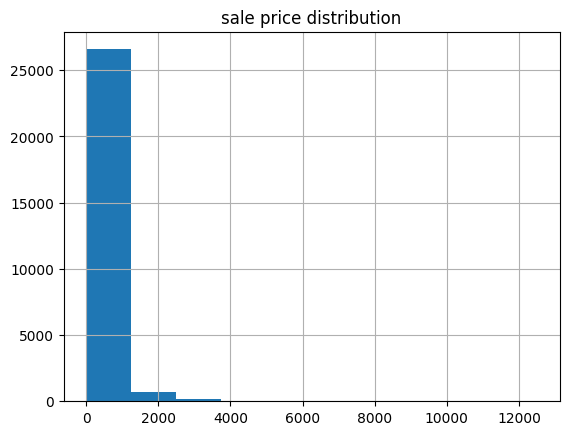

In [13]:
df['sale_price'].hist()
plt.title('sale price distribution')
plt.show()


brand
Fresho              638
bb Royal            539
BB Home             428
DP                  250
Fresho Signature    171
Name: count, dtype: int64


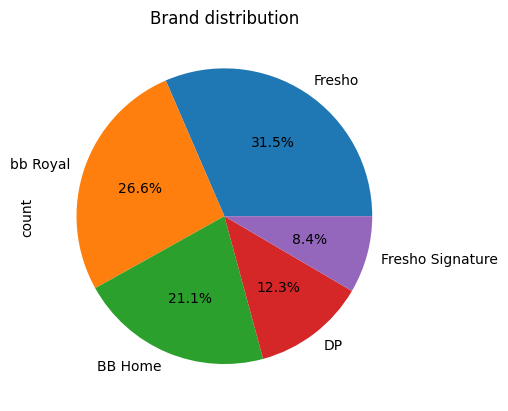

In [29]:
print(df['brand'].value_counts().head())
df['brand'].value_counts().head().plot(kind= 'pie', autopct = '%1.1f%%')
plt.title('Brand distribution')
plt.show()

['Fresho', 'bb Royal', 'BB Home', 'DP', 'Fresho Signature']


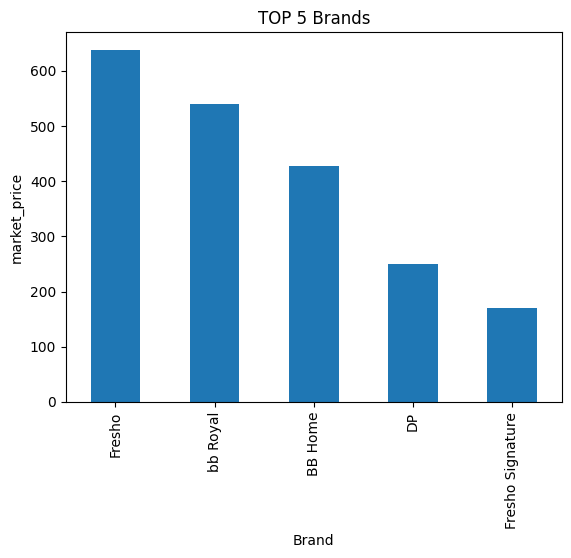

In [57]:
print(df['brand'].value_counts().head(5).index.tolist())
df['brand'].value_counts().head().plot(kind='bar')
plt.title('TOP 5 Brands')
plt.xlabel('Brand')
plt.ylabel('market_price')
plt.show()

In [18]:
df['sale_price'].mean()


322.5148078388677

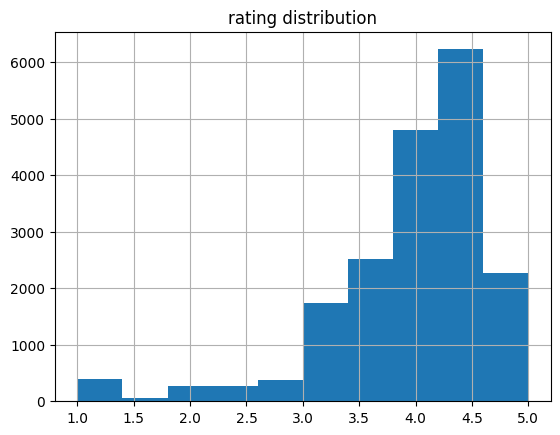

In [21]:
df['rating'].hist()
plt.title('rating distribution')
plt.show()

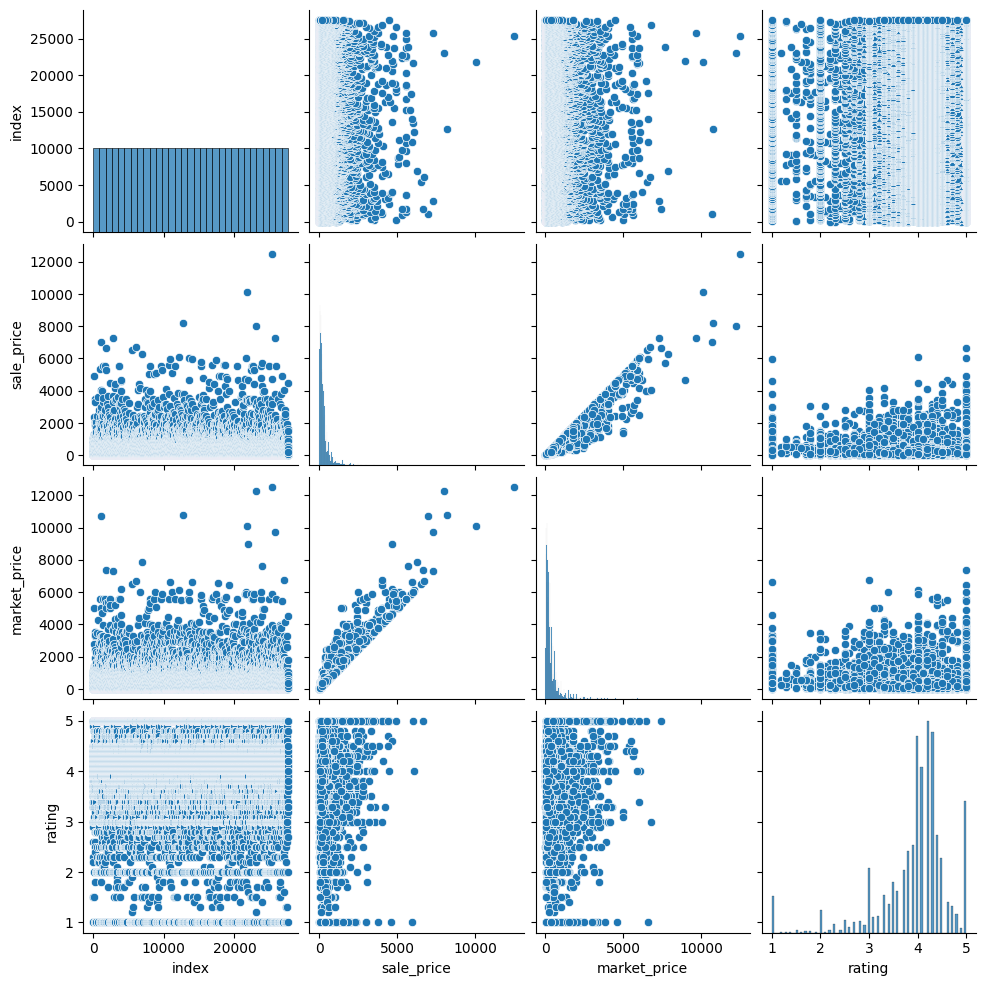

In [43]:
sns.pairplot(df)
plt.show()

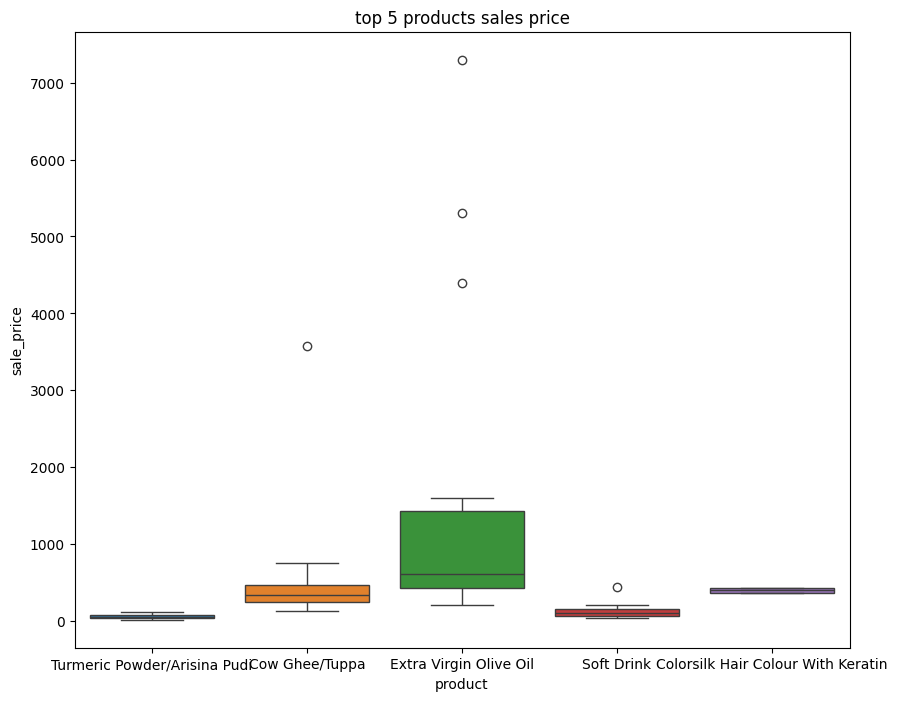

In [7]:
## top 5 most popular products
products_of_interest = df['product'].value_counts().head(5).index.tolist()
df_filtered = df[df['product'].isin(products_of_interest)]
plt.figure(figsize=(10,8))
sns.boxplot(x='product',y='sale_price', data=df_filtered, hue='product')
plt.title('top 5 products sales price')
plt.show()

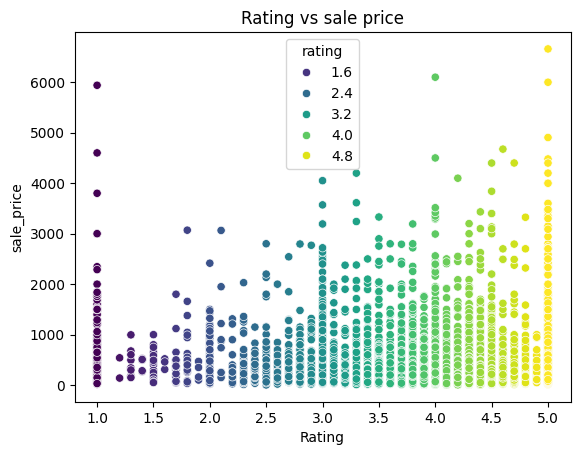

In [37]:
##Are customers rate products lower if the product is expensive?
sns.scatterplot(x='rating', y='sale_price', data=df, hue='rating', palette='viridis')
plt.title('Rating vs sale price')
plt.xlabel('Rating')
plt.ylabel('sale_price')
plt.show()

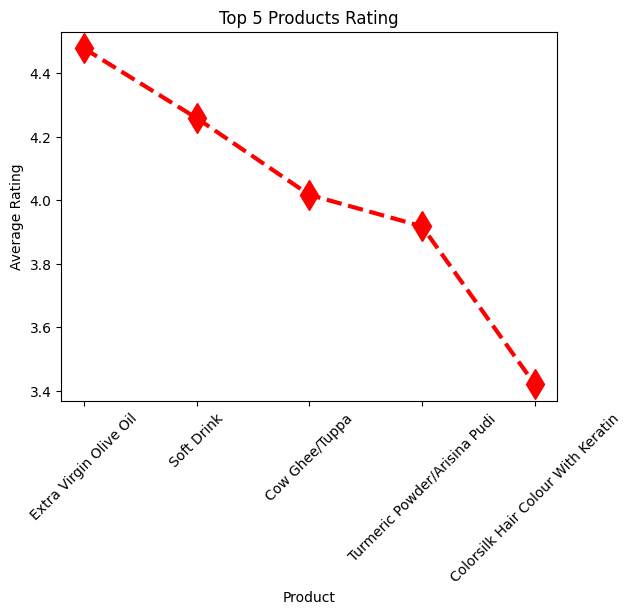

In [15]:
top_5_products = df_filtered.groupby('product')['rating'].mean().sort_values(ascending=False).head(5)

# Plot the line plot
plt.plot(top_5_products.index, top_5_products.values, color='red', linewidth=3, marker='d', markersize=15, linestyle='--')

# Set plot title and labels
plt.title('Top 5 Products Rating')
plt.xlabel('Product')
plt.ylabel('Average Rating')

# Show plot
plt.xticks(rotation=45)  # Rotate product names if needed
plt.show()